In [1]:
import pandas as pd


In [4]:
df = pd.read_excel('./sales_data_sample.xlsx')

In [5]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
5,10168,36,1,3479.76,2003-10-28,Shipped,USA,Medium,0.00,14.1694
6,10180,29,9,2497.77,2003-11-11,Shipped,France,Small,0.00,1.9656
7,10188,48,1,5512.32,2003-11-18,Shipped,Norway,Medium,0.20,90.7152
8,10201,22,2,2168.54,2003-12-01,Shipped,USA,Small,0.20,5.7825
9,10211,41,14,4708.44,2004-01-15,Shipped,France,Medium,0.00,34.4700


In [10]:
# sum country in data
df['COUNTRY'].value_counts()


COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [11]:
# Cho biết kích thước của dữ liệu
df.shape

(2823, 10)

In [16]:

import numpy as np
#Hãy cho biết độ lệch của giá trị đặt hàng của các sản phẩm
np.std(df['SALES'], ddof=1)

# std_dev_sample = np.std(sales, )



1841.8651057401805

In [17]:
#Nếu sử dụng Z-Score Scaler cho SALES thì giá trị 10000 sẽ được scale thành bao nhiêu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['SALES']])
scaler.transform([[10000]])


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[3.50039366]])

In [18]:
#Hãy cho biết mức độ nhọn của giá trị đặt hàng của các sản phẩm
from scipy.stats import kurtosis
kurtosis(df['SALES'])


1.7873782707746377

In [19]:
import numpy as np
from scipy.stats import kurtosis

# Tính kurtosis
kurt_value = kurtosis(df['SALES'])

print("Giá trị kurtosis là:", kurt_value)

Giá trị kurtosis là: 1.7873782707746377


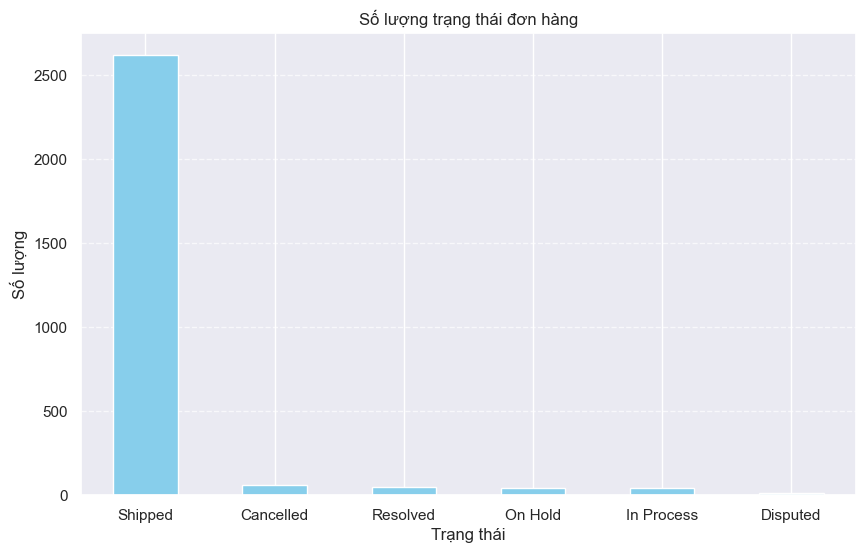

Trạng thái chỉ có 2 cột: Series([], Name: count, dtype: int64)


In [22]:
# Vẽ biểu đồ cột 
import matplotlib.pyplot as plt

# Đếm số lượng cho mỗi trạng thái
status_counts = df['STATUS'].value_counts()

# Vẽ biểu đồ cột cho tất cả các trạng thái
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng trạng thái đơn hàng')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Kiểm tra trạng thái chỉ có 2 cột
two_columns_status = status_counts[status_counts == 2]
print("Trạng thái chỉ có 2 cột:", two_columns_status)

In [25]:
#Có mối liên hệ nào giữa trạng thái giao hàng và giá trị đặt hàng hay không
# Trả về có hoặc không




In [26]:
# Nếu sử dụng Z-Score Scaler cho SALES, sau đó tiếp tục áp dụng Max Absolute Scaler thì giá trị có index = 100 được scale thành bao nhiêu
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df[['SALES']])
scaler.transform([[100]])


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


array([[0.00710086]])

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Dữ liệu SALES giả định
sales = df['SALES']

# Z-Score Scaling
scaler_z = StandardScaler()
sales_z = scaler_z.fit_transform(np.array(sales).reshape(-1, 1))

# Max Absolute Scaling
scaler_max_abs = MaxAbsScaler()
sales_max_abs = scaler_max_abs.fit_transform(sales_z)

# Giá trị tại index = 100 giả định
value_index_100 = 100  # Thay đổi giá trị này nếu cần

# Tính toán
scaled_value = sales_max_abs[99]  # Lấy giá trị theo index

print("Giá trị sau khi scale:", scaled_value[0])


Giá trị sau khi scale: 0.21980534776072624


In [28]:
#Cho biết giá trị của SALES sau khi dùng chuẩn hóa Z-Score Scaler là 0.25, hỏi giá trị trước chuẩn hóa là bao nhiêu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['SALES']])
scaler.inverse_transform([[0.25]])


array([[4014.27378493]])

In [29]:
# Hãy cho biết mức độ lệch của SALES sau khi được transform qua hàm log
np.std(np.log(df['SALES']), ddof=1)





0.5213241826022745

In [30]:
# Hãy cho biết mức độ lệch của SALES trước khi được transform qua hàm log
np.std(df['SALES'], ddof=1)


1841.8651057401805

In [35]:
#Hãy cho biết tổng doanh số đặt hàng ở quốc gia nào nhiều ở vị trí thứ 5
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

In [36]:
#Nếu sử dụng Min-Max Scaler cho SALES thì giá trị có index từ 50 đên 59 được scale thành bao nhiêu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['SALES']])
scaler.transform(df[['SALES']][50:60])


array([[0.5714917 ],
       [0.14223049],
       [0.26896469],
       [0.84693401],
       [0.25104351],
       [0.16997177],
       [0.20775741],
       [0.34636676],
       [0.3334174 ],
       [0.23372378]])

In [37]:
# Tạo DataFrame

# Tính độ lệch chuẩn theo nhóm kích thước đặt hàng
std_dev_by_size = df.groupby('DEALSIZE')['SALES'].std()

# Sắp xếp theo độ lệch chuẩn
sorted_sizes = std_dev_by_size.sort_values()

print(sorted_sizes)

DEALSIZE
Small      577.183322
Medium    1047.090148
Large     1294.739895
Name: SALES, dtype: float64


In [38]:
#Có mối liên hệ nào giữa trạng thái giao hàng và kích thước đặt hàng hay không
# Trả về có hoặc không
# Có mối liên hệ giữa trạng thái giao hàng và kích thước đ
# ặt hàng
def check_relation(order_status, order_size):
    # Tạo bảng tần số
    crosstab = pd.crosstab(order_status, order_size)
    
    # Kiểm tra mối liên hệ
    chi2, p, _, _ = chi2_contingency(crosstab)
    
    # Kiểm tra mức ý nghĩa
    alpha = 0.05
    if p <= alpha:
        return 'Có'
    else:
        return 'Không'

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Hàm kiểm tra mối liên hệ
def check_relation(df):
    # Tạo bảng tần số
    crosstab = pd.crosstab(df['STATUS'], df['SALES'])
    
    # Kiểm tra mối liên hệ
    chi2, p, _, _ = chi2_contingency(crosstab)
    
    # Kiểm tra mức ý nghĩa
    alpha = 0.05
    if p <= alpha:
        return 'Có'
    else:
        return 'Không'

# Sử dụng hàm với dữ liệu của bạn
result = check_relation(df)
print(result)



Không


In [ ]:
#Nếu sử dụng Z-Score Scaler cho SALES, sau đó tiếp tục áp dụng Max Absolute Scaler thì giá trị có index = 100 được scale thành bao nhiêu

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileScaler, PowerTransformer


In [43]:
# Hãy cho biết độ lệch của giá trị đặt hàng của các sản phẩm


# a.
# 1.161076000881289


# b.
# 1.461076000881289


# c.
# 1.191076000881289


# d.
# 1.361076000881289


# e.
# 1.261076000881289

# giải và chọn đáp án
import numpy as np
# giá trị đặt hàng của các sản phẩm
sales = df['SALES']
# tính độ lệch chuẩn
std_dev_sample = np.std(sales, ddof=1)
print(std_dev_sample)
# tính độ lệch tuyệt đối
kurt_value = kurtosis(sales)
print(kurt_value)


1841.8651057401805
1.7873782707746377


In [44]:
std_dev_sales = df['SALES'].std()

print("Độ lệch chuẩn của giá trị đặt hàng:", std_dev_sales)

Độ lệch chuẩn của giá trị đặt hàng: 1841.8651057401805


In [45]:
import pandas as pd

# Giả sử df đã được định nghĩa và có cột SALES
# df = pd.DataFrame({'SALES': [2871, 2765.9, 3884.34, ...]})

# Tính giá trị trung bình và độ lệch chuẩn
mean_sales = df['SALES'].mean()
std_dev_sales = df['SALES'].std()

# Tính z-score cho từng giá trị
df['Z_Score'] = (df['SALES'] - mean_sales) / std_dev_sales

# Hiển thị z-score cho từng giá trị
print(df[['SALES', 'Z_Score']])


        SALES   Z_Score
0     2871.00 -0.370760
1     2765.90 -0.427821
2     3884.34  0.179411
3     3746.70  0.104682
4     5205.27  0.896581
...       ...       ...
2818  2244.40 -0.710958
2819  3978.51  0.230539
2820  5417.57  1.011844
2821  2116.16 -0.780583
2822  3079.44 -0.257592

[2823 rows x 2 columns]


In [46]:
import pandas as pd

# Giả sử df đã được định nghĩa và có cột SALES
# df = pd.DataFrame({'SALES': [2871, 2765.9, 3884.34, ...]})

# Tính giá trị trung bình và độ lệch chuẩn
mean_sales = df['SALES'].mean()
std_dev_sales = df['SALES'].std()

# Tính z-score cho từng giá trị trong cột SALES
df['Z_Score'] = (df['SALES'] - mean_sales) / std_dev_sales

# Hiển thị z-score
print(df[['SALES', 'Z_Score']])

# Nếu bạn muốn tìm giá trị z-score cho một giá trị cụ thể, bạn có thể làm như sau
specific_value = 10000  # Thay bằng giá trị bạn muốn tính
z_score_specific = (specific_value - mean_sales) / std_dev_sales
print("Z-Score cho giá trị 10000 là:", z_score_specific)


        SALES   Z_Score
0     2871.00 -0.370760
1     2765.90 -0.427821
2     3884.34  0.179411
3     3746.70  0.104682
4     5205.27  0.896581
...       ...       ...
2818  2244.40 -0.710958
2819  3978.51  0.230539
2820  5417.57  1.011844
2821  2116.16 -0.780583
2822  3079.44 -0.257592

[2823 rows x 2 columns]
Z-Score cho giá trị 10000 là: 3.4997736305451204


In [49]:
import pandas as pd


# Tính giá trị trung bình và độ lệch chuẩn
mean_sales = df['SALES'].mean()
std_dev_sales = df['SALES'].std()

print("Giá trị trung bình:", mean_sales)
print("Độ lệch chuẩn:", std_dev_sales)

# Tính z-score
df['Z_Score'] = (df['SALES'] - mean_sales) / std_dev_sales

# Hiển thị z-score
print(df[['SALES', 'Z_Score']])

# tính std của z-score
std_dev_z_score = df['Z_Score'].mean()
print("Độ lệch chuẩn của z-score:", std_dev_z_score)


Giá trị trung bình: 3553.889071909316
Độ lệch chuẩn: 1841.8651057401805
        SALES   Z_Score
0     2871.00 -0.370760
1     2765.90 -0.427821
2     3884.34  0.179411
3     3746.70  0.104682
4     5205.27  0.896581
...       ...       ...
2818  2244.40 -0.710958
2819  3978.51  0.230539
2820  5417.57  1.011844
2821  2116.16 -0.780583
2822  3079.44 -0.257592

[2823 rows x 2 columns]
Độ lệch chuẩn của z-score: 1.8122237681447825e-16


In [ ]:
import numpy as np
from scipy.stats import kurtosis

# Tính kurtosis
kurt_value = kurtosis(df['SALES'])

print("Giá trị kurtosis là:", kurt_value)

Giá trị kurtosis là: 1.7873782707746377
